In [1]:
from utils.tools import * 

In [29]:
path=r"C:\Users\cjang\Desktop\\"
path2 = r"C:\Users\cjang\Desktop\impedance_data\data\\" 
data = ['DE_40_1_30.mpt']

In [30]:
adj_re = mpt_data(path, data)
re2 = mpt_data(path2, data)


No handles with labels found to put in legend.


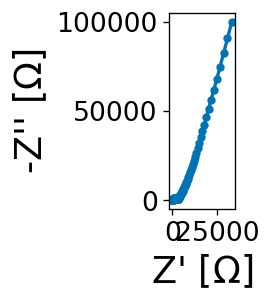

In [31]:
adj_re.mpt_plot()

No handles with labels found to put in legend.


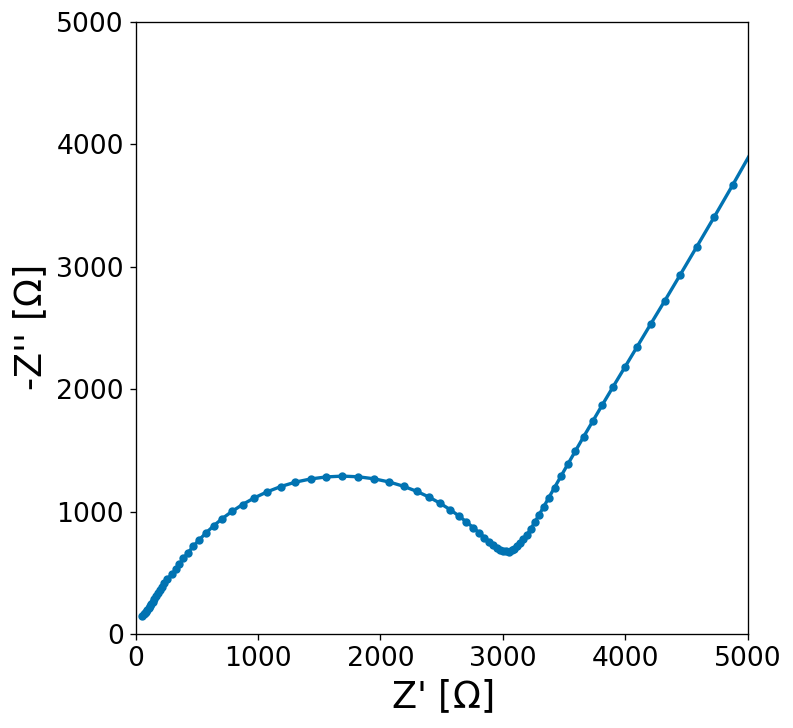

In [32]:
adj_re.set_new_gph_dims(15,15)
adj_re.mpt_plot(x_window = [0,5000], y_window = [0,5000])

cycle || No. RC-elements ||   u
[1]            10            0.87


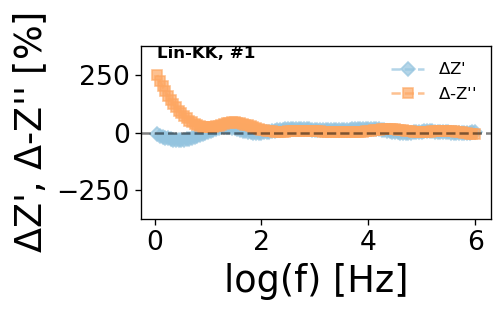

In [33]:
adj_re.Lin_KK(plot = 'residuals')

cycle || No. RC-elements ||   u
[1]            10            0.87


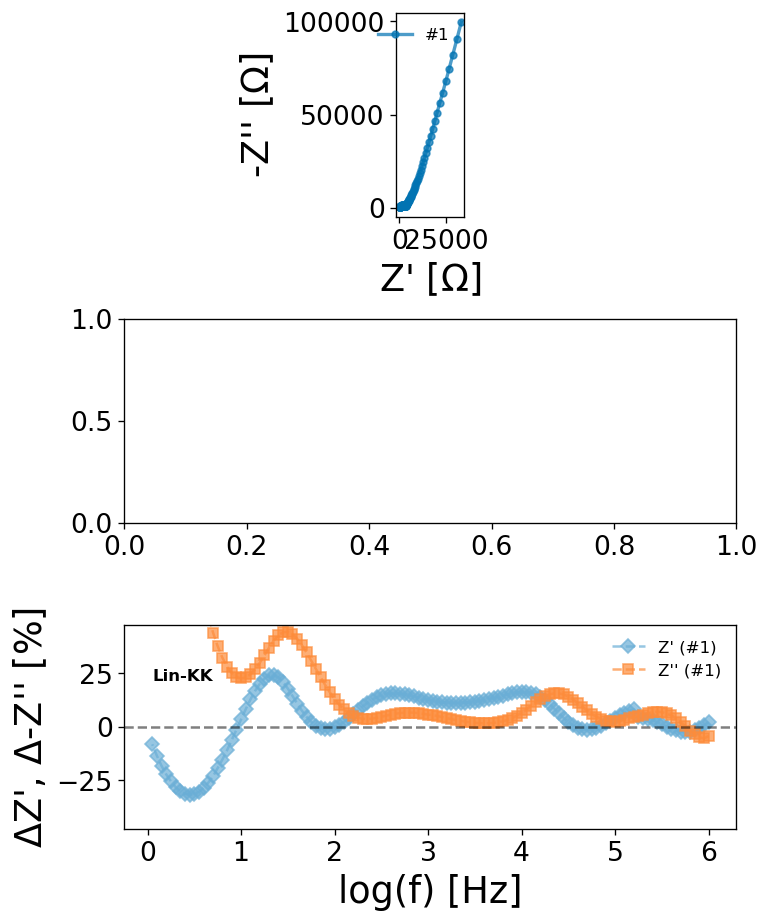

In [34]:
adj_re.Lin_KK(plot = 'w_data')

In [35]:
num_RC='auto' 
legend='on'
plot='residuals'
bode='off'
nyq_xlim='none'
nyq_ylim='none'
weight_func='Boukamp'

In [36]:

print('cycle || No. RC-elements ||   u')
adj_re.decade = []
adj_re.Rparam = []
adj_re.t_const = []
adj_re.Lin_KK_Fit = []
adj_re.R_names = []
adj_re.KK_R0 = []
adj_re.KK_R = []
adj_re.number_RC = []
adj_re.number_RC_sort = []

adj_re.KK_u = []
adj_re.KK_Rgreater = []
adj_re.KK_Rminor = []
M = 2
for i in range(len(adj_re.df)):
    adj_re.decade.append(np.log10(np.max(adj_re.df[i].f))-np.log10(np.min(adj_re.df[i].f))) #determine the number of RC circuits based on the number of decades measured and num_RC
    adj_re.number_RC.append(M)
    adj_re.number_RC_sort.append(M) #needed for adj_re.KK_R
    adj_re.Rparam.append(KK_Rnam_val(re=adj_re.df[i].re, re_start=adj_re.df[i].re.idxmin(), num_RC=int(adj_re.number_RC[i]))[0]) #Creates intial guesses for R's
    adj_re.t_const.append(KK_timeconst(w=adj_re.df[i].w, num_RC=int(adj_re.number_RC[i]))) #Creates time constants values for adj_re.number_RC -(RC)- circuits
    
    adj_re.Lin_KK_Fit.append(minimize(KK_errorfunc, adj_re.Rparam[i], method='leastsq', args=(adj_re.df[i].w.values, adj_re.df[i].re.values, adj_re.df[i].im.values, adj_re.number_RC[i], weight_func, adj_re.t_const[i]) )) #maxfev=99
    adj_re.R_names.append(KK_Rnam_val(re=adj_re.df[i].re, re_start=adj_re.df[i].re.idxmin(), num_RC=int(adj_re.number_RC[i]))[1]) #creates R names
    for j in range(len(adj_re.R_names[i])):
        adj_re.KK_R0.append(adj_re.Lin_KK_Fit[i].params.get(adj_re.R_names[i][j]).value)
adj_re.number_RC_sort.insert(0,0) #needed for adj_re.KK_R
for i in range(len(adj_re.df)):
    adj_re.KK_R.append(adj_re.KK_R0[int(np.cumsum(adj_re.number_RC_sort)[i]):int(np.cumsum(adj_re.number_RC_sort)[i+1])]) #assigns resistances from each spectra to their respective df
    adj_re.KK_Rgreater.append(np.where(np.array(adj_re.KK_R)[i] >= 0, np.array(adj_re.KK_R)[i], 0) )
    adj_re.KK_Rminor.append(np.where(np.array(adj_re.KK_R)[i] < 0, np.array(adj_re.KK_R)[i], 0) )
    adj_re.KK_u.append(1-(np.abs(np.sum(adj_re.KK_Rminor[i]))/np.abs(np.sum(adj_re.KK_Rgreater[i]))))

for i in range(len(adj_re.df)):
    while adj_re.KK_u[i] <= 0.75 or adj_re.KK_u[i] >= 0.88:
        adj_re.number_RC_sort0 = []
        adj_re.KK_R_lim = []
        adj_re.number_RC[i] = adj_re.number_RC[i] + 1
        adj_re.number_RC_sort0.append(adj_re.number_RC)
        adj_re.number_RC_sort = np.insert(adj_re.number_RC_sort0, 0,0)
        adj_re.Rparam[i] = KK_Rnam_val(re=adj_re.df[i].re, re_start=adj_re.df[i].re.idxmin(), num_RC=int(adj_re.number_RC[i]))[0] #Creates intial guesses for R's
        adj_re.t_const[i] = KK_timeconst(w=adj_re.df[i].w, num_RC=int(adj_re.number_RC[i])) #Creates time constants values for adj_re.number_RC -(RC)- circuits
        adj_re.Lin_KK_Fit[i] = minimize(KK_errorfunc, adj_re.Rparam[i], method='leastsq', args=(adj_re.df[i].w.values, adj_re.df[i].re.values, adj_re.df[i].im.values, adj_re.number_RC[i], weight_func, adj_re.t_const[i]) ) #maxfev=99
        adj_re.R_names[i] = KK_Rnam_val(re=adj_re.df[i].re, re_start=adj_re.df[i].re.idxmin(), num_RC=int(adj_re.number_RC[i]))[1] #creates R names
        adj_re.KK_R0 = np.delete(np.array(adj_re.KK_R0), np.s_[0:len(adj_re.KK_R0)])
        adj_re.KK_R0 = []
        for q in range(len(adj_re.df)):
            for j in range(len(adj_re.R_names[q])):
                adj_re.KK_R0.append(adj_re.Lin_KK_Fit[q].params.get(adj_re.R_names[q][j]).value)
        adj_re.KK_R_lim = np.cumsum(adj_re.number_RC_sort) #used for KK_R[i]

        adj_re.KK_R[i] = adj_re.KK_R0[adj_re.KK_R_lim[i]:adj_re.KK_R_lim[i+1]] #assigns resistances from each spectra to their respective df
        adj_re.KK_Rgreater[i] = np.where(np.array(adj_re.KK_R[i]) >= 0, np.array(adj_re.KK_R[i]), 0)
        adj_re.KK_Rminor[i] = np.where(np.array(adj_re.KK_R[i]) < 0, np.array(adj_re.KK_R[i]), 0)
        adj_re.KK_u[i] = 1-(np.abs(np.sum(adj_re.KK_Rminor[i]))/np.abs(np.sum(adj_re.KK_Rgreater[i])))
    else:
        print('['+str(i+1)+']'+'            '+str(adj_re.number_RC[i]),'           '+str(np.round(adj_re.KK_u[i],2)))

adj_re.KK_circuit_fit = []
adj_re.KK_rr_re = []
adj_re.KK_rr_im = []
functs = []
for i in range(2,81):
    functs.append('KK_RC'+str(i))

for i in range(len(adj_re.df)):
    cir_num = int(adj_re.number_RC[i])
    cir_funct = eval(functs[cir_num - 2])
    adj_re.KK_circuit_fit.append(cir_funct(w=adj_re.df[0].w, Rs=adj_re.Lin_KK_Fit[0].params.get('Rs').value, R_values=adj_re.KK_R[0], t_values=adj_re.t_const[0]))
    if cir_num >= 81:
        print('RC simulation circuit not defined')
        print('   Number of RC = ', adj_re.number_RC)
    adj_re.KK_rr_re.append(residual_real(re=adj_re.df[i].re, fit_re=adj_re.KK_circuit_fit[i].real, fit_im=-adj_re.KK_circuit_fit[i].imag)) #relative residuals for the real part
    adj_re.KK_rr_im.append(residual_imag(im=adj_re.df[i].im, fit_re=adj_re.KK_circuit_fit[i].real, fit_im=-adj_re.KK_circuit_fit[i].imag)) #relative residuals for the imag part


cycle || No. RC-elements ||   u
[1]            10            0.87


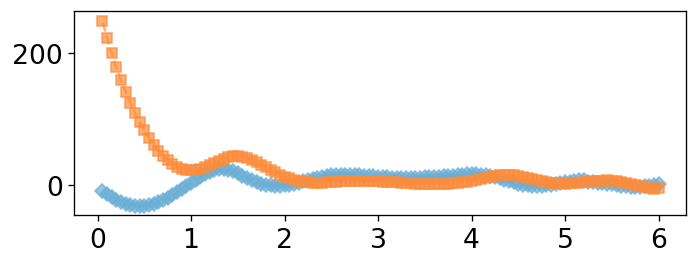

In [37]:
fig = figure(figsize=(6, 8), dpi=120, facecolor='w', edgecolor='k')
fig.subplots_adjust(left=0.1, right=0.95, hspace=0.5, bottom=0.1, top=0.95)
#ax = fig.add_subplot(311, aspect='equal')
#ax1 = fig.add_subplot(312)
ax2 = fig.add_subplot(313)


colors = sns.color_palette("colorblind", n_colors=len(adj_re.df))
colors_real = sns.color_palette("Blues", n_colors=len(adj_re.df)+2)
colors_imag = sns.color_palette("Oranges", n_colors=len(adj_re.df)+2)

i = 0

ax2.plot(np.log10(adj_re.df[i].f), adj_re.KK_rr_re[i]*100, color=colors_real[i+1], marker='D', ls='--', ms=6, alpha=.7, label=adj_re.label_re_1[i])
ax2.plot(np.log10(adj_re.df[i].f), adj_re.KK_rr_im[i]*100, color=colors_imag[i+1], marker='s', ls='--', ms=6, alpha=.7, label=adj_re.label_im_1[i])

In [38]:
kk_df = pd.DataFrame({'f':np.log10(adj_re.df[0].f), 're':adj_re.KK_rr_re[0]*100, 'im':adj_re.KK_rr_im[0]*100})

In [39]:
kk_df

,f,re,im
0,6.000008,2.155356,-4.391716
1,5.949998,0.547337,-5.484998
2,5.900002,-0.699239,-4.897739
3,5.850002,-1.668959,-3.579462
4,5.800000,-2.385213,-1.835600
...,...,...,...
115,0.250326,-25.544185,159.130240
116,0.199943,-22.330908,178.664816
117,0.149908,-18.343172,200.210400
118,0.100258,-13.624246,223.576856


No handles with labels found to put in legend.


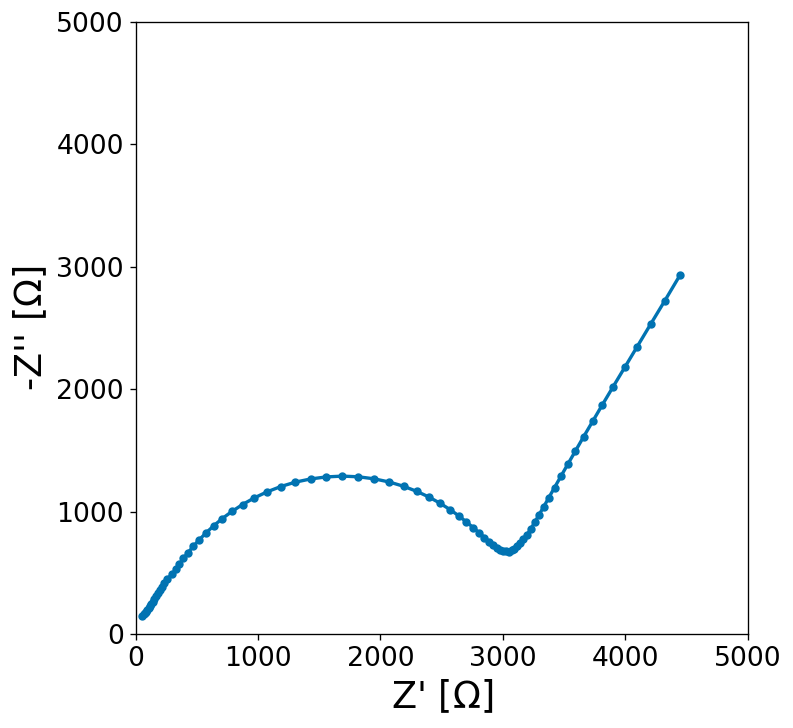

In [40]:
kk_df['difference'] = abs(kk_df['re'] - kk_df['im'])
diff_mean = kk_df['difference'].mean()
masked_df = kk_df[kk_df['difference'] < diff_mean * 0.25]
re2 = mpt_data(path, data, mask = [10**masked_df['f'].max(),10**masked_df['f'].min()])
re2.set_new_gph_dims(15,15)
re2.mpt_plot(x_window = [0,5000], y_window = [0,5000])

In [43]:
def masker(kk_df,number):
    kk_df['difference'] = abs(kk_df['re'] - kk_df['im'])
    diff_mean = kk_df['difference'].mean()
    masked_df = kk_df[kk_df['difference'] < diff_mean * 0.25]
    re2 = mpt_data(path, data, mask = [10**masked_df['f'].max(),10**masked_df['f'].min()])
    re2.set_new_gph_dims(15,15)
    re2.mpt_plot(x_window = [0,5000], y_window = [0,5000])


    Rs_guess = 40

    R_guess = 2959
    n_guess = 0.8
    fs_guess = 23023

    R2_guess = 258738
    n2_guess = 0.8
    fs2_guess = 0.2
    fit_guess = re2.guesser(Rs_guess,R_guess,n_guess,fs_guess,R2_guess,n2_guess,fs2_guess)
    re2.mpt_plot(fitting = 'on',rr = 'on')

No handles with labels found to put in legend.
No handles with labels found to put in legend.
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 557
    # data points      = 158
    # variables        = 7
    chi-square         = 123.802461
    reduced chi-square = 0.81988385
    Akaike info crit   = -24.5374316
    Bayesian info crit = -3.09926638
[[Variables]]
    Rs:   30.2206685 +/- 2.78430002 (9.21%) (init = 40)
    R:    3112.31394 +/- 22.8830636 (0.74%) (init = 2959)
    n:    0.82812619 +/- 0.00312130 (0.38%) (init = 0.8)
    fs:   21721.8716 +/- 247.380526 (1.14%) (init = 23023)
    R2:   26563.5462 +/- 6364.61041 (23.96%) (init = 258738)
    n2:   0.81445957 +/- 0.01790044 (2.20%) (init = 0.8)
    fs2:  9.99999979 +/- 2.01594492 (20.16%) (init = 0.2)
[[Correlations]] (unreported correlations are < 0.100)
    C(R2, fs2) =  0.998
    C(n2, fs2) = -0.958
    C(R2, n2)  = -0.942
    C(R, fs)   = -0.903
    C(R, n2)   =  0.895
    C(R, fs2)  = -0.793
    

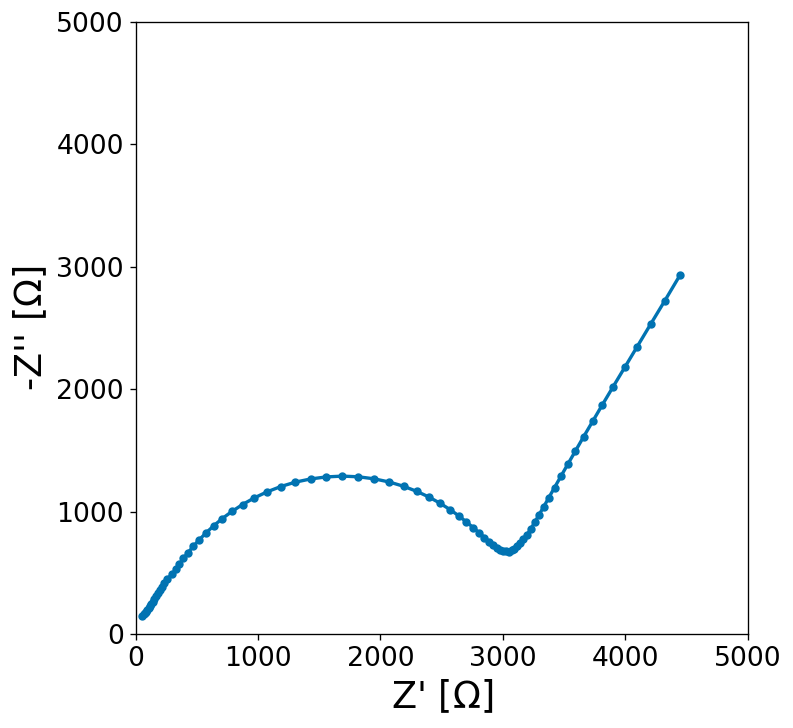

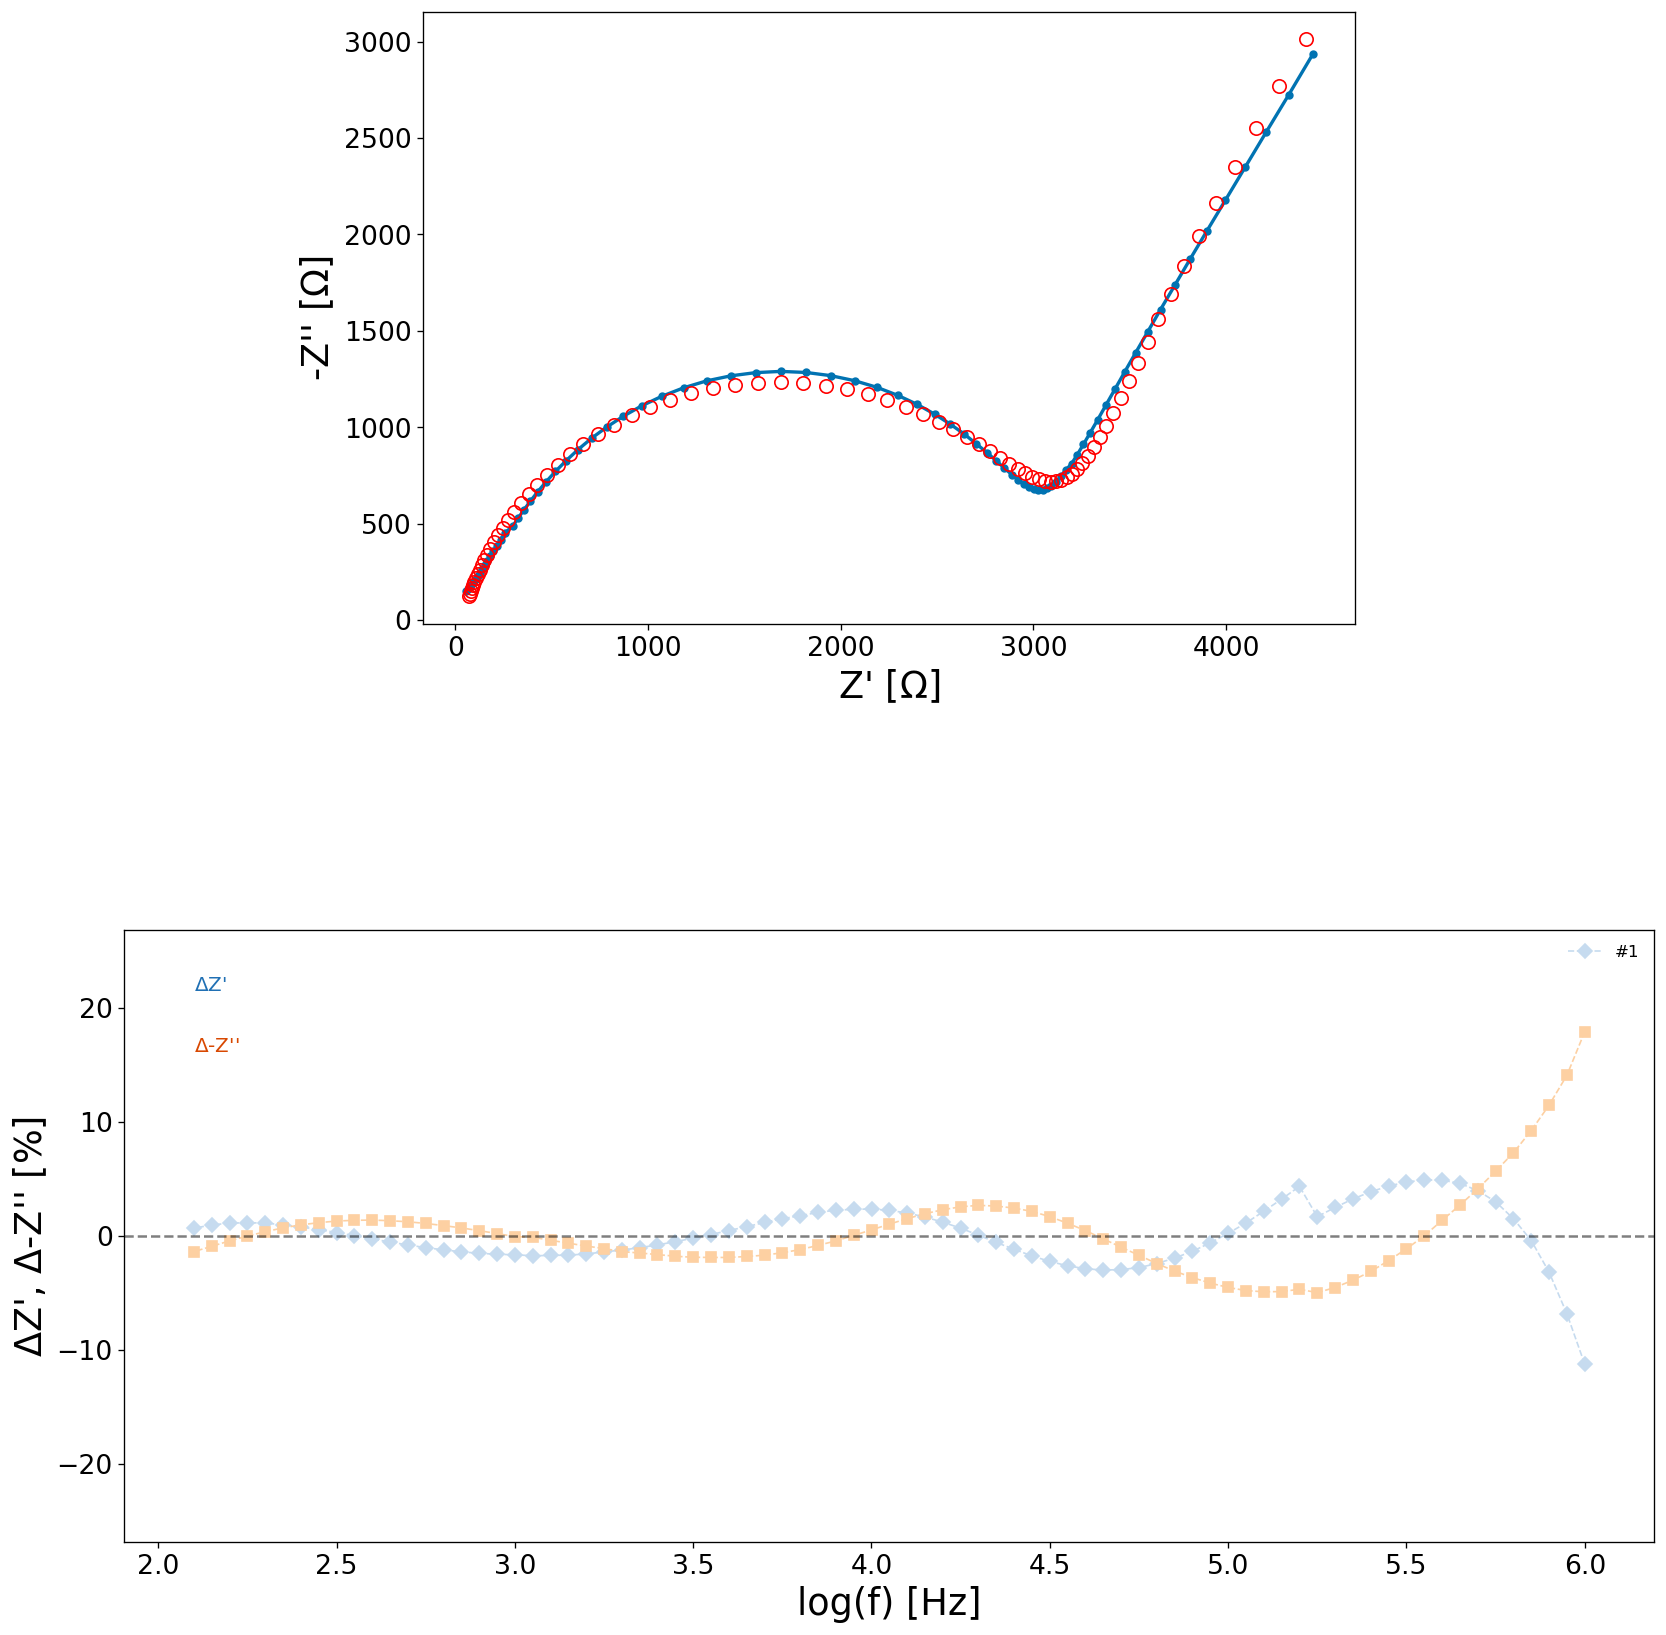

In [44]:
masker(kk_df, .3)